# Part 1: PCA and Variance Threshold in a Linear Regression

### 1. Import the housing data as a data frame and ensure that the data is loaded properly.

In [1]:
#Import necessary libraries 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pydotplus
from IPython.display import Image
from sklearn import tree
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale 

In [2]:
housing_df = pd.read_csv("train.csv")

In [3]:
print(housing_df.shape)
housing_df.head(5)

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 2. Drop the "Id" column and any features that are missing more than 40% of their values.

In [4]:
housing_df.drop('Id',axis=1,inplace=True)
housing_df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
housing_df_null = housing_df.isnull().sum() / len(housing_df) #Calculate % of null values in each column
housing_df_null  

MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 80, dtype: float64

In [6]:
missing_features = housing_df_null[housing_df_null > 0.40].index #Identify columns with over 40% missing values
missing_features 

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [7]:
#Drop the columns with over 40% missing values 
 
housing_df.drop(missing_features, axis=1, inplace=True)

In [8]:
housing_df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [9]:
housing_df.shape #Display the number of rows and columns in the dataframe

(1460, 75)

### 3. For numerical columns, fill in any missing data with the median value.

In [10]:
#Identify numeric columns in the dataframe
housing_df.select_dtypes(include=np.number).columns 

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [11]:
#Look for the number of missing values in the numeric fields of the dataframe
housing_df.select_dtypes([np.number]).isnull().sum() 

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [12]:
#Median before the update
housing_df.select_dtypes([np.number]).median() 

MSSubClass           50.0
LotFrontage          69.0
LotArea            9478.5
OverallQual           6.0
OverallCond           5.0
YearBuilt          1973.0
YearRemodAdd       1994.0
MasVnrArea            0.0
BsmtFinSF1          383.5
BsmtFinSF2            0.0
BsmtUnfSF           477.5
TotalBsmtSF         991.5
1stFlrSF           1087.0
2ndFlrSF              0.0
LowQualFinSF          0.0
GrLivArea          1464.0
BsmtFullBath          0.0
BsmtHalfBath          0.0
FullBath              2.0
HalfBath              0.0
BedroomAbvGr          3.0
KitchenAbvGr          1.0
TotRmsAbvGrd          6.0
Fireplaces            1.0
GarageYrBlt        1980.0
GarageCars            2.0
GarageArea          480.0
WoodDeckSF            0.0
OpenPorchSF          25.0
EnclosedPorch         0.0
3SsnPorch             0.0
ScreenPorch           0.0
PoolArea              0.0
MiscVal               0.0
MoSold                6.0
YrSold             2008.0
SalePrice        163000.0
dtype: float64

In [13]:
#Filling the missing/null values in the dataframe with the median
housing_df.fillna(housing_df.select_dtypes([np.number]).median().iloc[0],inplace=True)

In [14]:
#Look for the number of missing values in the numeric fields of the dataframe after updating 
housing_df.select_dtypes([np.number]).isnull().sum() 

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [15]:
#Median after the update
housing_df.select_dtypes([np.number]).median() 

MSSubClass           50.0
LotFrontage          63.0
LotArea            9478.5
OverallQual           6.0
OverallCond           5.0
YearBuilt          1973.0
YearRemodAdd       1994.0
MasVnrArea            0.0
BsmtFinSF1          383.5
BsmtFinSF2            0.0
BsmtUnfSF           477.5
TotalBsmtSF         991.5
1stFlrSF           1087.0
2ndFlrSF              0.0
LowQualFinSF          0.0
GrLivArea          1464.0
BsmtFullBath          0.0
BsmtHalfBath          0.0
FullBath              2.0
HalfBath              0.0
BedroomAbvGr          3.0
KitchenAbvGr          1.0
TotRmsAbvGrd          6.0
Fireplaces            1.0
GarageYrBlt        1977.0
GarageCars            2.0
GarageArea          480.0
WoodDeckSF            0.0
OpenPorchSF          25.0
EnclosedPorch         0.0
3SsnPorch             0.0
ScreenPorch           0.0
PoolArea              0.0
MiscVal               0.0
MoSold                6.0
YrSold             2008.0
SalePrice        163000.0
dtype: float64

### 4. For categorical columns, fill in any missing data with the most common value (mode).

In [16]:
#Identify categorical columns and their most common values
housing_df.select_dtypes([object]).mode()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [17]:
#Replace missing values in categorical columns with their most common values
housing_df.fillna(housing_df.select_dtypes([object]).mode().iloc[0],inplace=True)
housing_df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [18]:
housing_df.select_dtypes([object]).isnull().sum() 

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

### 5. Convert the categorical columns to dummy variables.

In [19]:
housing_dummy_df = pd.get_dummies(housing_df, columns = housing_df.select_dtypes([object]).columns)
housing_dummy_df.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


### 6. Split the data into a training and test set, where the SalePrice column is the target.

In [20]:
x = housing_dummy_df.loc[:,housing_dummy_df.columns != 'SalePrice'] 
#get the target
y = housing_dummy_df['SalePrice']

#split the data into training and test sets (80% Training/20% Test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)

In [21]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1168, 281), (292, 281), (1168,), (292,))

### 7. Run a linear regression and report the R2-value and RMSE on the test set.

In [22]:
lr_model = LinearRegression() 
# Train the model
lr_model.fit(x_train,y_train) 

LinearRegression()

In [23]:
# Use model to make predictions on test set
predictions = lr_model.predict(x_test)

In [24]:
print("Root Mean Squared Error (RMSE):", sqrt(mean_squared_error(y_test, predictions)))
print("Coefficient of Determination (R2):", r2_score(y_test, predictions)) 

Root Mean Squared Error (RMSE): 30342.908937203494
Coefficient of Determination (R2): 0.8709058563473847


### 8. Fit and transform the training features with a PCA so that 90% of the variance is retained (see section 9.1 in the Machine Learning with Python Cookbook).

In [25]:
# Load the data 
# Standardize the feature matrix
standard_scalar = StandardScaler()
features = standard_scalar.fit_transform(x_train)
# Create a PCA that will retain 90% of variance
pca = PCA(n_components=0.9, whiten=True)
# Conduct PCA
features_pca = pca.fit_transform(scale(features)) 

### 9. How many features are in the PCA-transformed matrix?

In [26]:
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_pca.shape[1]) 

Original number of features: 281
Reduced number of features: 139


### 10. Transform but DO NOT fit the test features with the same PCA.

In [27]:
test_features = standard_scalar.transform(x_test) 
test_features

array([[ 0.07765223,  0.56347098,  0.19172366, ..., -0.12153092,
         0.46955369, -0.30599503],
       [ 0.4342622 , -0.27716525, -0.21701974, ..., -0.12153092,
         0.46955369, -0.30599503],
       [-0.8733077 , -0.69748336, -0.07327578, ..., -0.12153092,
         0.46955369, -0.30599503],
       ...,
       [-0.63556772, -0.27716525,  0.02609901, ..., -0.12153092,
         0.46955369, -0.30599503],
       [-0.63556772,  0.77363004,  0.0083716 , ..., -0.12153092,
        -2.12968191, -0.30599503],
       [ 0.07765223,  0.77363004,  0.02609901, ..., -0.12153092,
        -2.12968191,  3.26802693]])

In [28]:
test_features_pca = pca.transform(test_features) #Transfor with the same PCA.
test_features_pca.shape

(292, 139)

### 11. Repeat step 7 with your PCA transformed data.

In [29]:
lr_model_pca = LinearRegression() 
# Train the model
lr_model_pca.fit(features_pca,y_train) 

LinearRegression()

In [30]:
# Use model to make predictions on test set
pca_predictions = lr_model_pca.predict(test_features_pca) 

In [31]:
print("Root Mean Squared Error (RMSE):", sqrt(mean_squared_error(y_test, pca_predictions)))
print("Coefficient of Determination (R2):", r2_score(y_test, pca_predictions)) 

Root Mean Squared Error (RMSE): 32908.91879995908
Coefficient of Determination (R2): 0.8481484106916732


### 12. Take your original training features (from step 6) and apply a min-max scaler to them.

In [32]:
#Create scaler
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))

In [33]:
# Scale feature
scaled_feature = minmax_scale.fit_transform(x_train)
scaled_feature

array([[0.41176471, 0.15753425, 0.03494823, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.13356164, 0.04440394, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.15068493, 0.03490149, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.29411765, 0.13356164, 0.02609082, ..., 0.        , 1.        ,
        0.        ],
       [0.82352941, 0.        , 0.00177616, ..., 0.        , 1.        ,
        0.        ],
       [0.05882353, 0.3390411 , 0.07805744, ..., 0.        , 1.        ,
        0.        ]])

### 13. Find the min-max scaled features in your training set that have a variance above 0.1 (see Section 10.1 in the Machine Learning with Python Cookbook).

In [34]:
# Create thresholder
thresholder = VarianceThreshold(threshold=.1)

In [35]:
# Create high variance feature matrix
features_high_variance = thresholder.fit_transform(scaled_feature)

In [36]:
# View high variance feature matrix
features_high_variance[0:3]

array([[0.88333333, 0.5       , 1.        , 0.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 1.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 1.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 1.        ],
       [0.83333333, 0.5       , 1.        , 0.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0. 

### 14. Transform but DO NOT fit the test features with the same steps applied in steps 11 and 12.

In [37]:
# Scale feature
scaled_test_feature = minmax_scale.transform(x_test)
scaled_test_feature

array([[0.23529412, 0.20205479, 0.05204609, ..., 0.        , 1.        ,
        0.        ],
       [0.32352941, 0.13356164, 0.0331861 , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.09931507, 0.03981864, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.05882353, 0.13356164, 0.04440394, ..., 0.        , 1.        ,
        0.        ],
       [0.05882353, 0.21917808, 0.04358597, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.21917808, 0.04440394, ..., 0.        , 0.        ,
        1.        ]])

In [38]:
# Create high variance feature matrix
test_features_high_variance = thresholder.transform(scaled_test_feature)
# View high variance feature matrix
test_features_high_variance[0:3]

array([[0.85      , 0.5       , 1.        , 0.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 1.        ,
        1.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 1.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 1.        , 1.        ],
       [0.78333333, 0.5       , 1.        , 0.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 1.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 0. 

### 15. Repeat step 7 with the high variance data.

In [39]:
#lr_model = LinearRegression() 
# Train the model
lr_model.fit(features_high_variance,y_train) 
# Use model to make predictions on test set
high_variance_predictions = lr_model.predict(test_features_high_variance)

print("Root Mean Squared Error (RMSE):", sqrt(mean_squared_error(y_test, high_variance_predictions)))
print("Coefficient of Determination (R2):", r2_score(y_test, high_variance_predictions)) 

Root Mean Squared Error (RMSE): 55034.32256655691
Coefficient of Determination (R2): 0.5753223910429259


### 16. Summarize your findings.

Findings: In linear regression, the R2 value is between 0 and 1 and is a measure of how well the regression predictions approximate real values (goodness of fit of a model). Among the models run above, I see Linear Regression Model gives a better result for R2 compared to the other 2 model trainings.

##### Linear Regression Model
 
Root Mean Squared Error (RMSE): 30342.908937203494

Coefficient of Determination (R2): 0.8709058563473847

##### PCA Transformed Model
 
Root Mean Squared Error (RMSE): 32908.91879995908

Coefficient of Determination (R2): 0.8481484106916732

##### Min-Max Transformed Model
 
Root Mean Squared Error (RMSE): 55034.32256655691

Coefficient of Determination (R2): 0.5753223910429259

# Part 2: Categorical Feature Selection

### 1. Import the data as a data frame and ensure it is loaded correctly.

In [40]:
mushroom_df = pd.read_csv("mushrooms.csv")
print(mushroom_df.shape)
mushroom_df.head(5)

(8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### 2. Convert the categorical features (all of them) to dummy variables.

In [41]:
mushroom_dummy_df = pd.get_dummies(mushroom_df, columns = mushroom_df.select_dtypes([object]).columns)
mushroom_dummy_df.head(5)

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


### 3. Split the data into a training and test set.

In [42]:
x = mushroom_dummy_df.drop(['class_e','class_p'], axis = 1) 
y = mushroom_dummy_df['class_e']

#split the data into training and test sets (80% Training/20% Test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)

### 4. Fit a decision tree classifier on the training set.

In [43]:
# Create decision tree classifier object
decisiontree = tree.DecisionTreeClassifier(random_state=1)
dt_model = decisiontree.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 1, 1], dtype=uint8)

### 5. Report the accuracy and create a confusion matrix for the model prediction on the test set.

In [44]:
score = round(accuracy_score(y_test, y_pred)*100,2)
print("Test Accuracy: {}%".format(score))

Test Accuracy: 100.0%


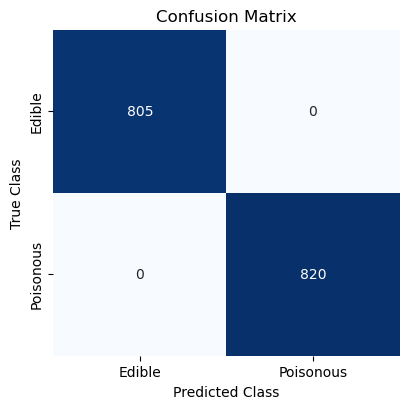

In [45]:
# Create confusion matrix
matrix = confusion_matrix(y_test, y_pred) 
 
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

#HeatMap
f, ax = plt.subplots(figsize =(4,4))
sns.heatmap(matrix, annot=True, cbar=None, cmap="Blues",fmt = ".0f", xticklabels=x_axis_labels, yticklabels = y_axis_labels )  
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

### 6. Create a visualization of the decision tree.

[Text(0.5625, 0.9375, 'x[27] <= 0.5\ngini = 0.499\nsamples = 6499\nvalue = [3111, 3388]'),
 Text(0.3125, 0.8125, 'x[53] <= 0.5\ngini = 0.288\nsamples = 3660\nvalue = [3023, 637]'),
 Text(0.1875, 0.6875, 'x[55] <= 0.5\ngini = 0.135\nsamples = 3229\nvalue = [2993, 236]'),
 Text(0.125, 0.5625, 'x[34] <= 0.5\ngini = 0.055\nsamples = 3080\nvalue = [2993, 87]'),
 Text(0.0625, 0.4375, 'gini = 0.0\nsamples = 2922\nvalue = [2922, 0]'),
 Text(0.1875, 0.4375, 'x[23] <= 0.5\ngini = 0.495\nsamples = 158\nvalue = [71, 87]'),
 Text(0.125, 0.3125, 'gini = 0.0\nsamples = 87\nvalue = [0, 87]'),
 Text(0.25, 0.3125, 'gini = 0.0\nsamples = 71\nvalue = [71, 0]'),
 Text(0.25, 0.5625, 'gini = 0.0\nsamples = 149\nvalue = [0, 149]'),
 Text(0.4375, 0.6875, 'x[80] <= 0.5\ngini = 0.13\nsamples = 431\nvalue = [30, 401]'),
 Text(0.375, 0.5625, 'gini = 0.0\nsamples = 30\nvalue = [30, 0]'),
 Text(0.5, 0.5625, 'gini = 0.0\nsamples = 401\nvalue = [0, 401]'),
 Text(0.8125, 0.8125, 'x[100] <= 0.5\ngini = 0.06\nsamples = 2

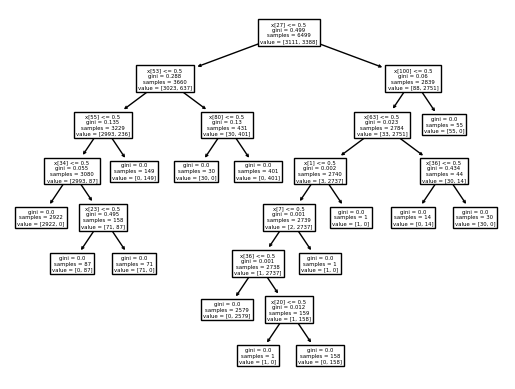

In [46]:
tree.plot_tree(decisiontree)

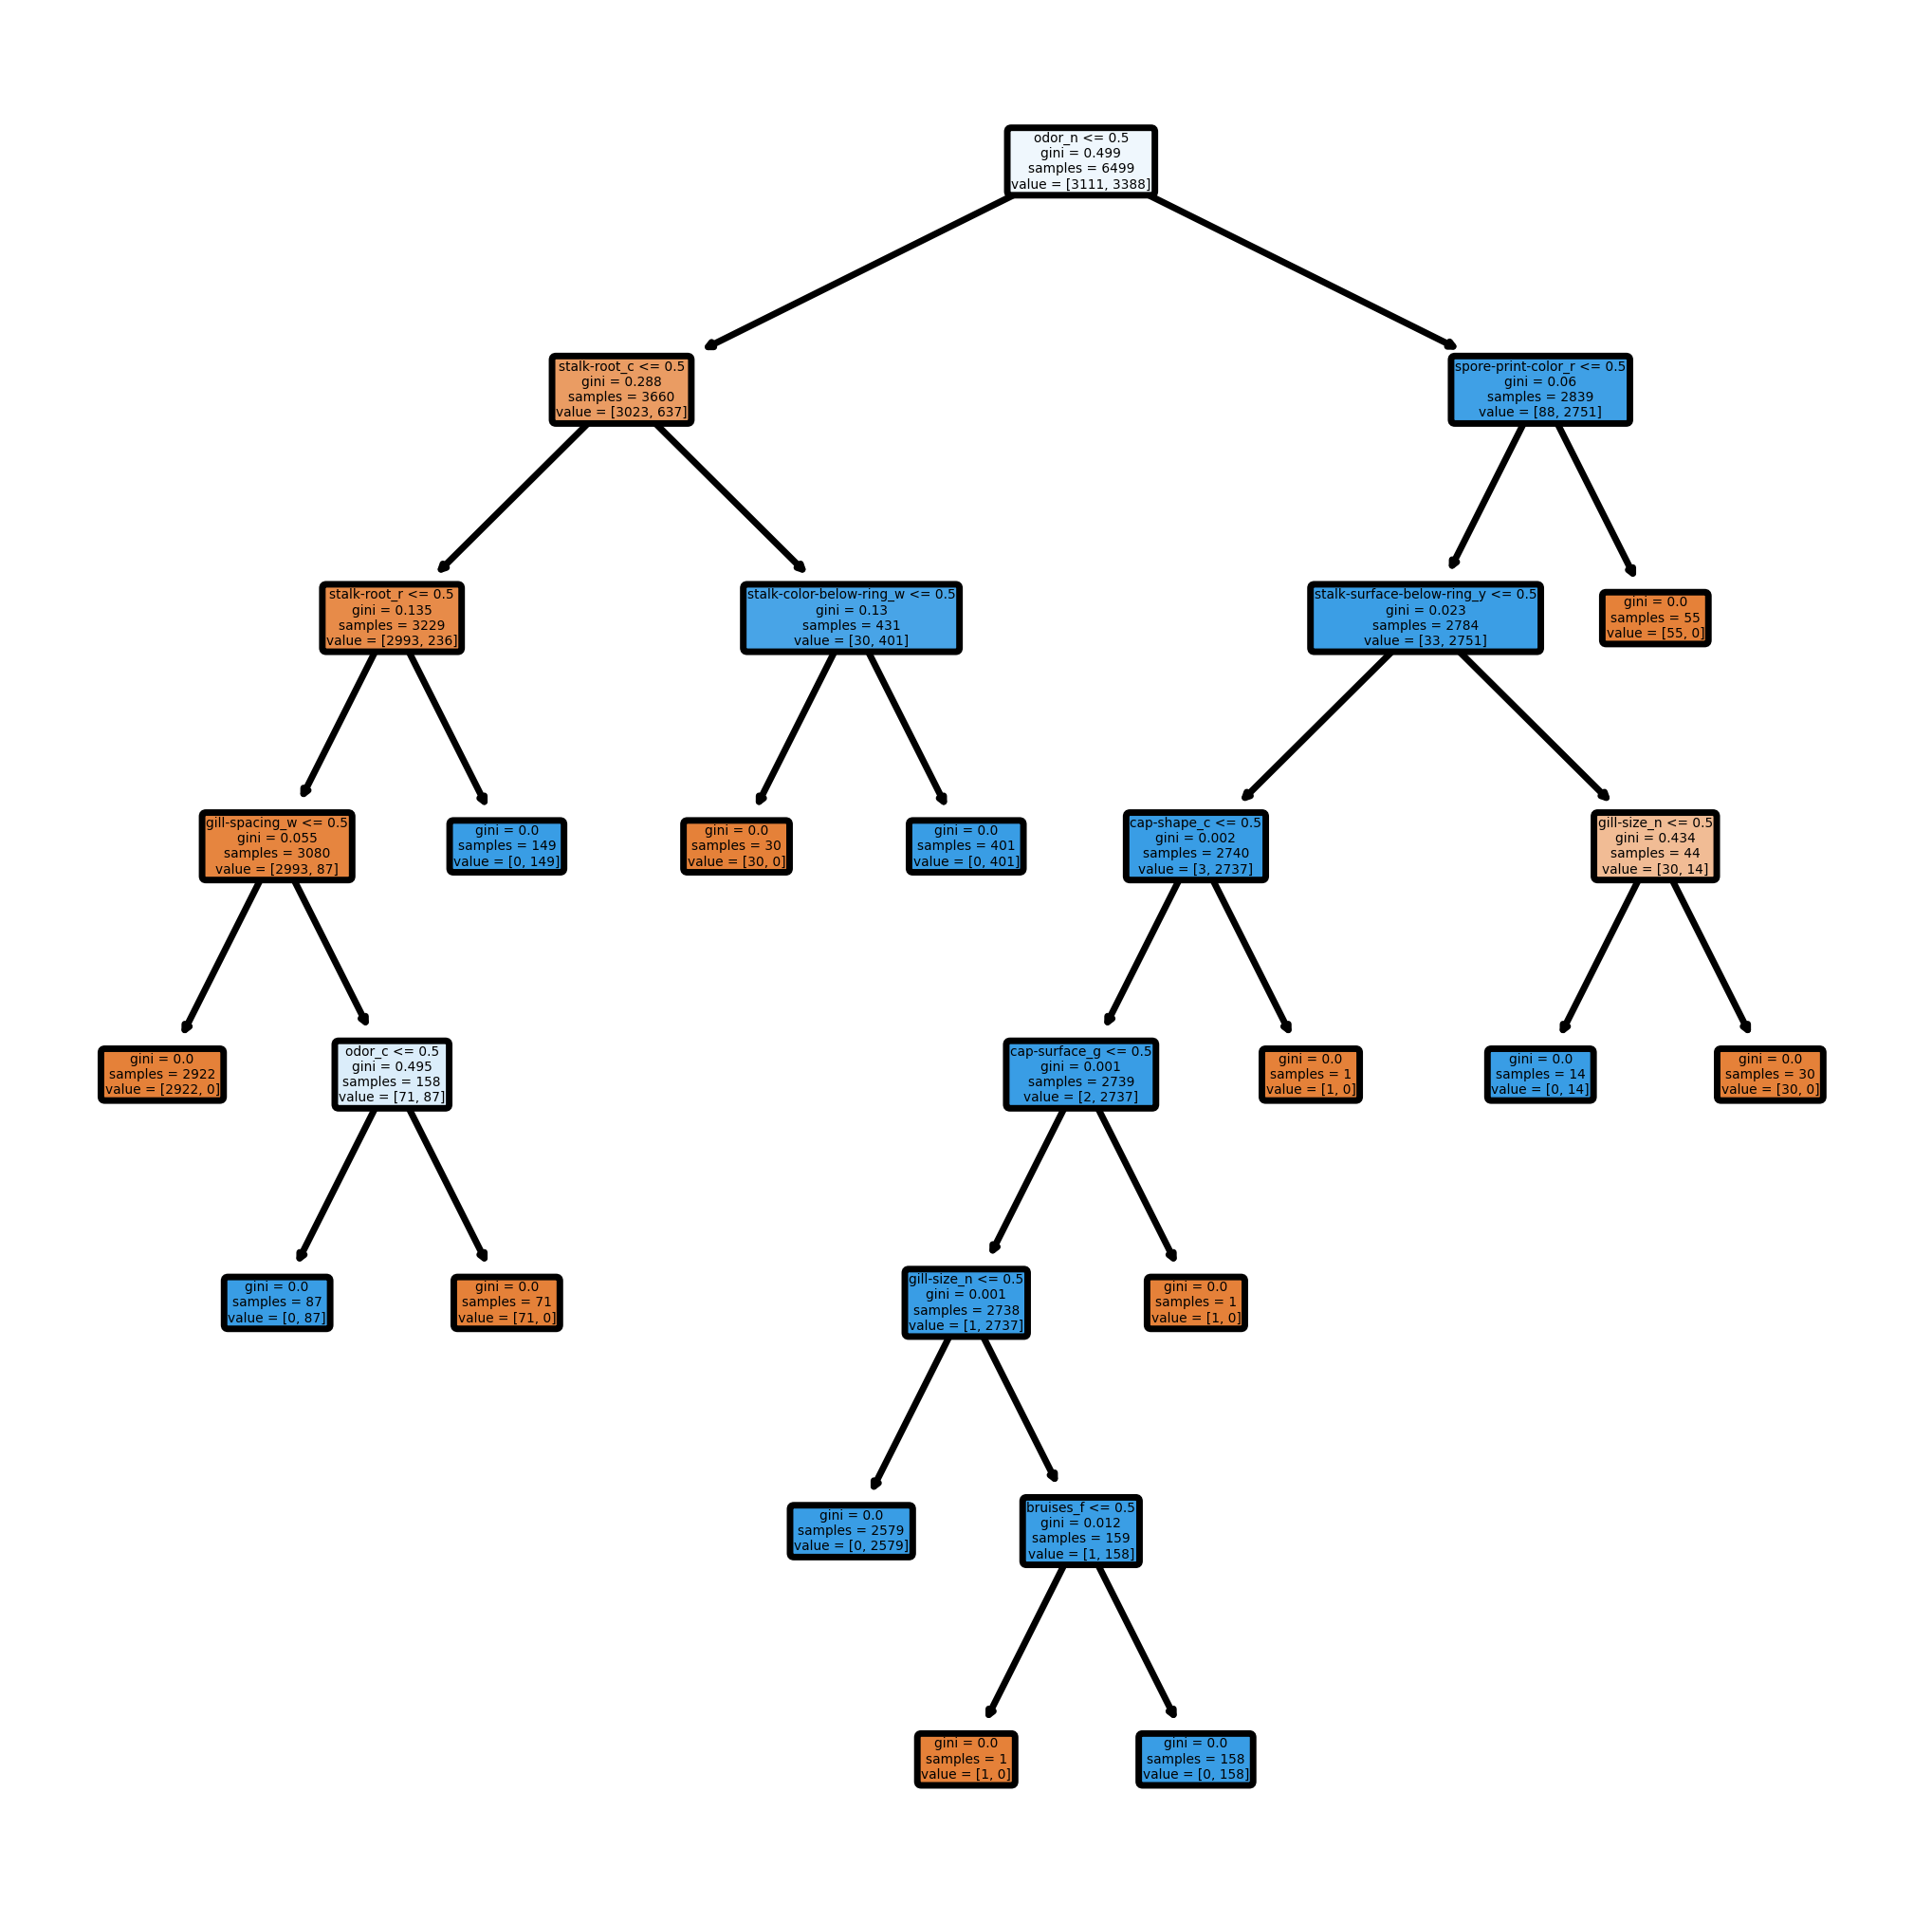

In [47]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=500)
tree.plot_tree(decisiontree, feature_names=x.columns,filled=True, rounded=True);
fig.savefig('imagename.png')

### 7. Use a χ2-statistic selector to pick the five best features for this data (see section 10.4 of the Machine Learning with Python Cookbook).

In [48]:
# Convert to categorical data by converting data to integers
features = x_train.astype(int)

# Select five features with highest chi-squared statistics
chi2_selector = SelectKBest(chi2, k=5)
features_kbest = chi2_selector.fit_transform(features, y_train)
features_kbest

array([[0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 1, 1],
       ...,
       [1, 0, 0, 1, 1],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]])

In [49]:
# Show results
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_kbest.shape[1])

Original number of features: 117
Reduced number of features: 5


### 8. Which five features were selected in step 7? Hint: Use the get_support function.

In [50]:
# Get columns to keep and create new dataframe with those only
cols = chi2_selector.get_support(indices = True)
features_df = features.iloc[:,cols]
print(features_df.shape)
features_df.head(5)

(6499, 5)


,odor_f,odor_n,gill-color_b,stalk-surface-above-ring_k,stalk-surface-below-ring_k
1610,0,1,0,0,0
1939,0,1,0,0,0
5573,0,0,1,1,1
7076,0,0,1,1,0
2000,0,1,0,0,0


### 9. Repeat steps 4 and 5 with the five best features selected in step 7.

In [51]:
x_best_5_train, x_best_5_test, y_best_5_train, y_best_5_test = train_test_split(features_df, y_train, test_size=0.2, random_state=1) 

In [52]:
decisiontree = tree.DecisionTreeClassifier(random_state=1)
dt_model = decisiontree.fit(x_best_5_train, y_best_5_train)
y_best_5_pred = dt_model.predict(x_best_5_test)
y_best_5_pred

array([0, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [53]:
score = round(accuracy_score(y_best_5_test, y_best_5_pred)*100,2)
print("Test Accuracy: {}%".format(score))

Test Accuracy: 92.08%


In [54]:
# Create confusion matrix
best_matrix = confusion_matrix(y_best_5_test, y_best_5_pred) 
best_matrix

array([[521, 103],
       [  0, 676]], dtype=int64)

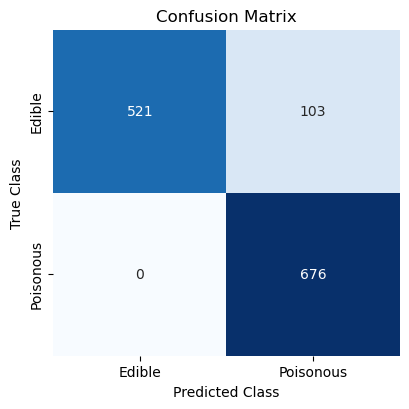

In [55]:
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

#HeatMap
f, ax = plt.subplots(figsize =(4,4))
sns.heatmap(best_matrix, annot=True, cbar=None, cmap="Blues",fmt = ".0f", xticklabels=x_axis_labels, yticklabels = y_axis_labels)  
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

### 10. Summarize your findings.

Findings: With all the features in the first Decision Tree Classifier there was 100% accuracy, and after reducing to 5 best features using X2 it went down to 92.08%. This revised accuracy is still high with only 5 features instead of 117. We get a  relatively good accuracy percentage with 95% reduction in features.